In [77]:
import pandas as pd
import matplotlib.pyplot as plt

alphas = [0.2, 0.4, 0.5, 0.6, 0.8]

df = pd.DataFrame()

for alpha in alphas:
    df_aux = pd.read_csv(f'data/tests_{alpha}.csv')
    df['problem'] = df_aux['problem']
    df['optimal'] = df_aux['optimal'].astype(int)
    df[f'time_{alpha}'] = df_aux['time']
    df[f'cost_{alpha}'] = df_aux['cost']
    df[f'gap_{alpha}'] = (df_aux['cost'] - df_aux['optimal'])/df_aux['optimal']

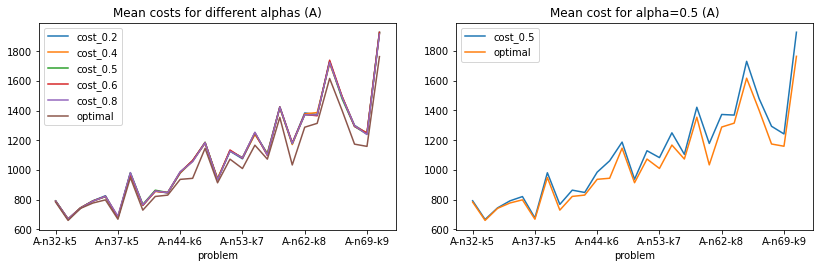

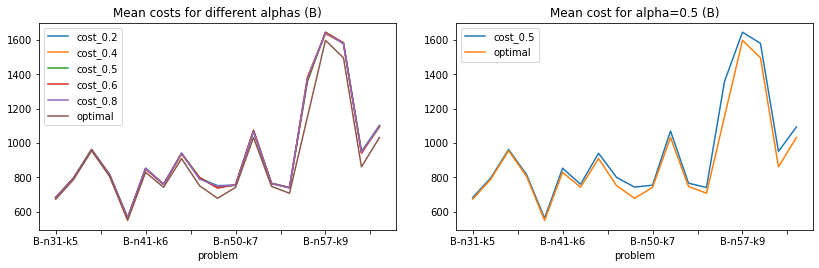

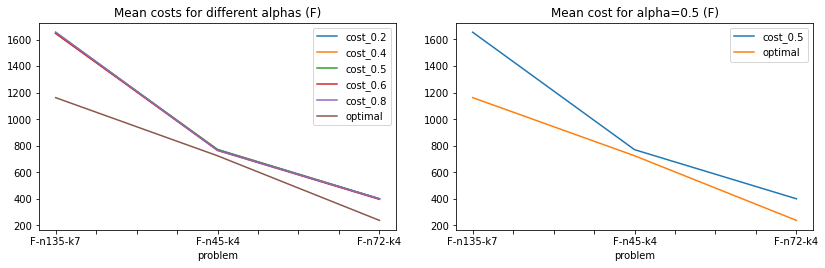

In [97]:
mean_costs = df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']]

for i,problem in enumerate(['A', 'B', 'F']):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
    fig. tight_layout(pad=3.0)
    ax[0].set_title(f"Mean costs for different alphas ({problem})")
    ax[1].set_title(f"Mean cost for alpha=0.5 ({problem})")

    mean_costs_p = mean_costs[mean_costs['problem'].str.contains(problem)]
    mean_costs_p.plot(x="problem", ax=ax[0], legend=True);
    mean_costs_p[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[1], legend=True);

    fig.savefig(f'mean_cost_{problem}.png', facecolor='white', transparent=False, dpi=500)


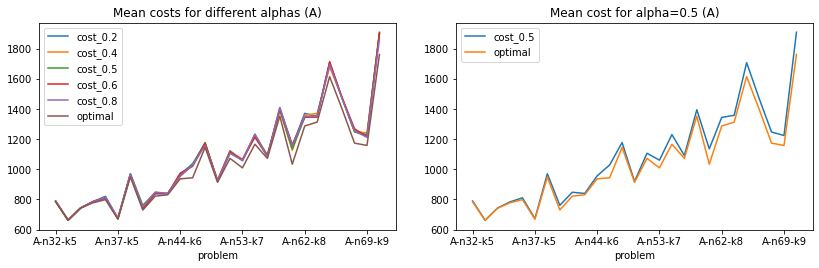

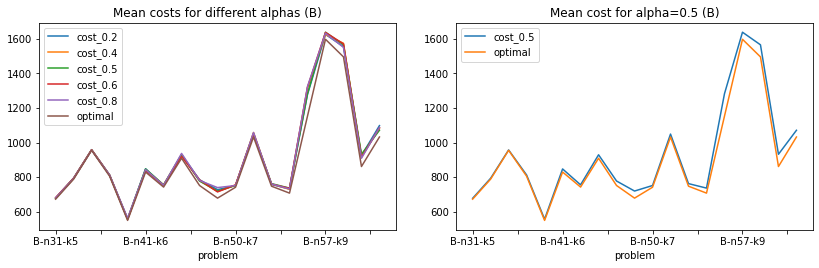

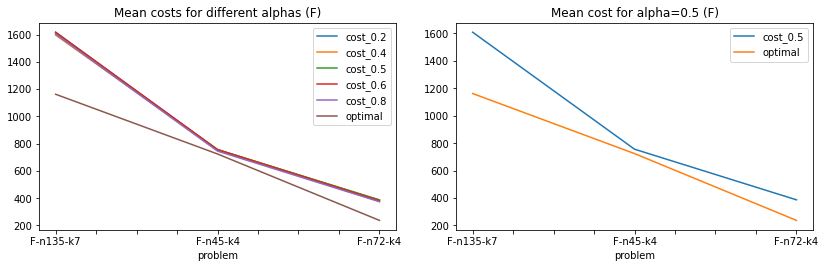

In [91]:

min_costs = df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']]

for i,problem in enumerate(['A', 'B', 'F']):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
    fig. tight_layout(pad=3.0)
    ax[0].set_title(f"Min costs for different alphas ({problem})")
    ax[1].set_title(f"Min cost for alpha=0.5 ({problem})")

    min_costs_p = min_costs[min_costs['problem'].str.contains(problem)]
    min_costs_p.plot(x="problem", ax=ax[0], legend=True);
    min_costs_p[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[1], legend=True);

    fig.savefig('')

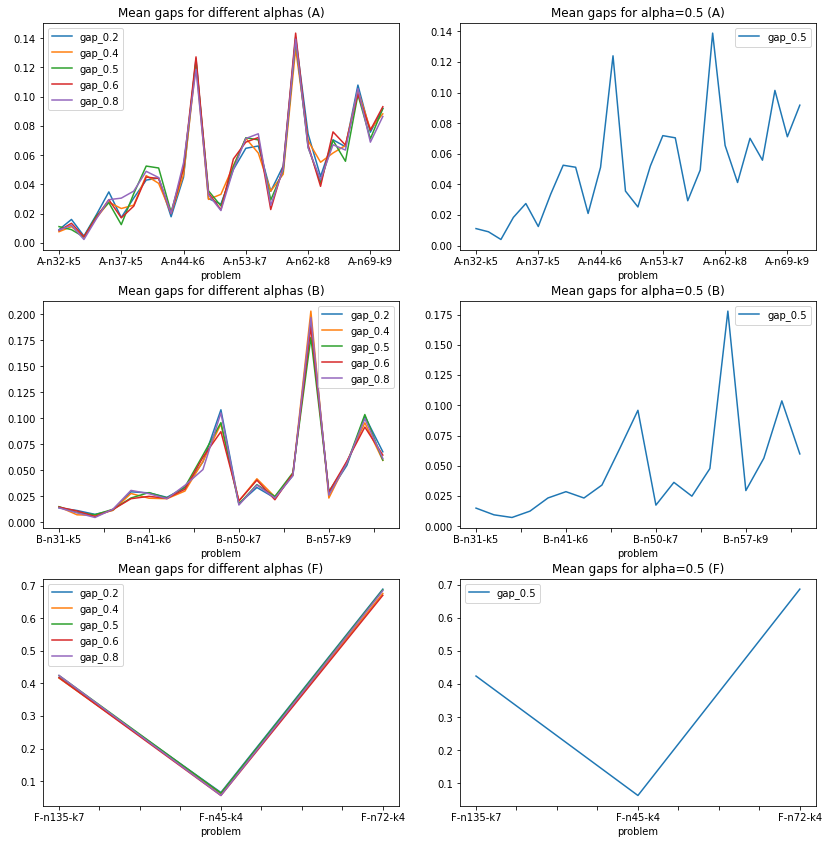

In [80]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

mean_gaps = df.groupby(['problem'], as_index=False).mean()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Mean gaps for different alphas ({problem})")
    ax[i][1].set_title(f"Mean gaps for alpha=0.5 ({problem})")

    mean_gaps_p = mean_gaps[mean_gaps['problem'].str.contains(problem)]
    mean_gaps_p.plot(x="problem", ax=ax[i][0], legend=True);
    mean_gaps_p[['problem', 'gap_0.5']].plot(x="problem", ax=ax[i][1], legend=True);

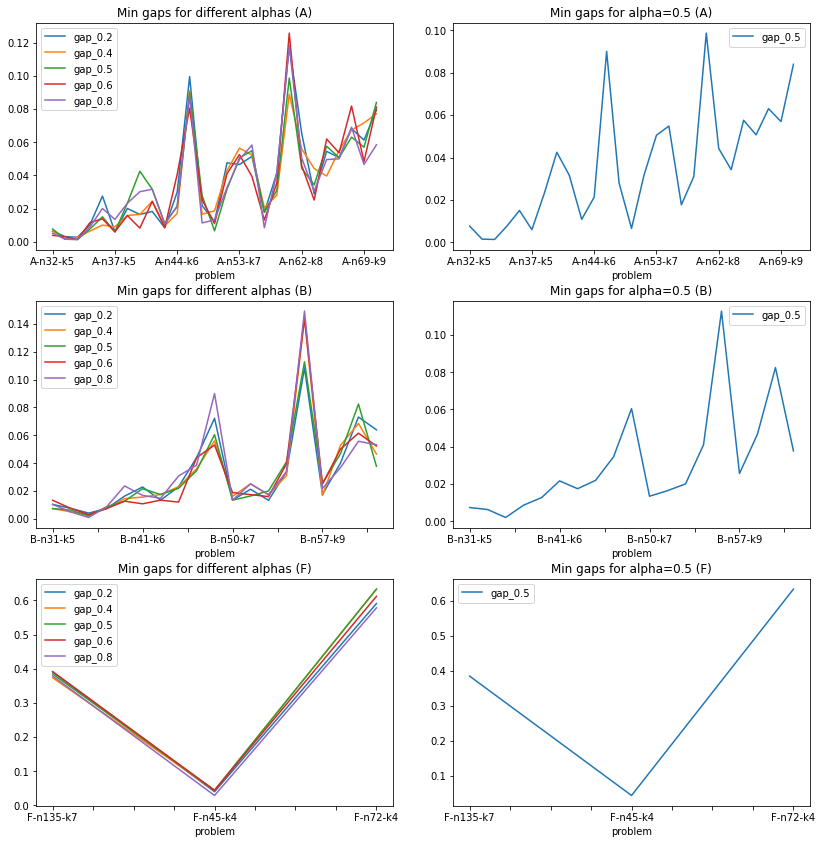

In [81]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

min_gaps = df.groupby(['problem'], as_index=False).min()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Min gaps for different alphas ({problem})")
    ax[i][1].set_title(f"Min gaps for alpha=0.5 ({problem})")

    min_gaps_p = min_gaps[min_gaps['problem'].str.contains(problem)]
    min_gaps_p.plot(x="problem", ax=ax[i][0], legend=True);
    min_gaps_p[['problem', 'gap_0.5']].plot(x="problem", ax=ax[i][1], legend=True);

In [82]:
alpha = 0.5
mean = df.groupby(['problem'])[[f'optimal', f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].mean().set_axis(['optimal', 'mean_cost', 'mean_time', 'mean_gap'], axis=1)
min = df.groupby(['problem'])[[f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].min().set_axis(['min_cost', 'min_time', 'min_gap'], axis=1)
results = pd.DataFrame()
results = pd.concat([results, mean, min], axis=1)
results = results[['optimal', 'min_cost', 'mean_cost', 'min_gap', 'mean_gap', 'min_time', 'mean_time']]
results['optimal'] = results['optimal'].astype(int)
results

,optimal,min_cost,mean_cost,min_gap,mean_gap,min_time,mean_time
problem,,,,,,,
A-n32-k5,784,790,792.750,0.007653,0.011161,1.33716,1.379451
A-n33-k5,661,662,667.000,0.001513,0.009077,1.47037,1.536663
A-n33-k6,742,743,745.000,0.001348,0.004043,2.03135,2.074255
A-n34-k5,778,784,792.375,0.007712,0.018477,1.60741,1.637968
A-n36-k5,799,811,821.000,0.015019,0.027534,1.63338,1.686815
A-n37-k5,669,673,677.375,0.005979,0.012519,1.65142,1.692139
A-n37-k6,949,971,981.000,0.023182,0.033720,2.34932,2.422416
A-n38-k5,730,761,768.375,0.042466,0.052568,1.83977,1.895279
A-n39-k5,822,848,864.125,0.031630,0.051247,1.87602,1.932310


In [83]:
results.to_csv('results.csv')

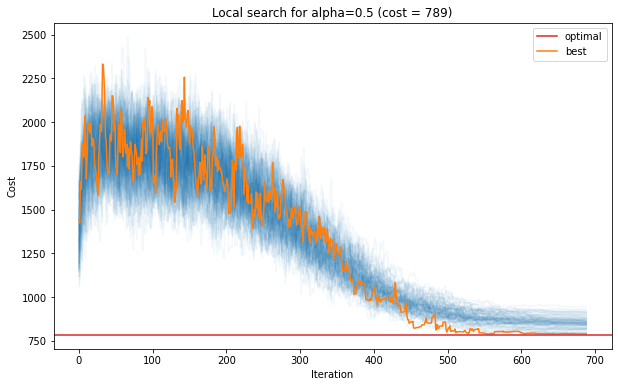

In [99]:
import numpy as np

local_search = pd.read_csv('data/local_search.csv', sep=';', header=None).fillna(method='ffill', axis=1).transpose().astype(int)
fig, ax = plt.subplots(figsize=(10, 6));

min_cost = local_search.min().min()
local_search.plot(ax=ax, color='tab:blue', alpha=0.05, legend=None);
last_index = local_search.transpose().columns[-1]
local_search.transpose()[local_search.transpose()[last_index] == local_search.transpose()[last_index].min()].transpose().plot(ax=ax, color='tab:orange', label='best')
ax.axhline(y=784, color='tab:red', label='optimal');

handles, labels = ax.get_legend_handles_labels();
ax.legend(reversed(handles), ['optimal', 'best'], loc='best');
ax.set_title(f"Local search for alpha=0.5 (cost = {min_cost})");
ax.set_xlabel("Iteration");
ax.set_ylabel("Cost");

fig.savefig('local_search.png', facecolor='white', transparent=False, dpi=500);
